# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---

Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;

# 📘 Proyecto Final: Identificación de operadores ineficaces – CallMeMaybe

El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

- Lleva a cabo el análisis exploratorio de datos
- Identificar operadores ineficaces
- Prueba las hipótesis estadísticas

## 🛠️ 1. Carga de datos y limpiea de datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest

# Cargar archivos subidos al entorno del notebook
calls = pd.read_csv('telecom_dataset_us.csv', parse_dates=['date'])
clients = pd.read_csv('telecom_clients_us.csv', parse_dates=['date_start'])

# Verificar nulos y tipos
print("Valores nulos en llamadas:")
print(calls.isnull().sum())
print("\nTipos de datos:")
print(calls.dtypes)

# Unir datasets por user_id
df = calls.merge(clients, on='user_id', how='left')
df.head()

Valores nulos en llamadas:
user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

Tipos de datos:
user_id                                                int64
date                   datetime64[ns, pytz.FixedOffset(180)]
direction                                             object
internal                                              object
operator_id                                          float64
is_missed_call                                          bool
calls_count                                            int64
call_duration                                          int64
total_call_duration                                    int64
dtype: object


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4,B,2019-08-01
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,B,2019-08-01
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,B,2019-08-01
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18,B,2019-08-01
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25,B,2019-08-01


🔍 columna internal (117 valores nulos)

* Esta columna indica si la llamada fue interna (entre operadores del mismo cliente).

* Los nulos podrían corresponder a llamadas externas, pero no está explícito.

✅Tratamiento para los datos:

* Cambiar estos valores nulos como llamadas externas y hacer un gráfico circular a partir de esto.

In [ ]:
df[df['operator_id'].isnull()].describe()

,user_id,operator_id,calls_count,call_duration,total_call_duration
count,8172.000000,0.0,8172.000000,8172.000000,8172.000000
mean,167256.867719,NaN,13.915321,66.013828,233.756118
std,586.989963,NaN,81.205371,954.840945,1252.370402
min,166377.000000,NaN,1.000000,0.000000,0.000000
25%,166782.000000,NaN,1.000000,0.000000,7.000000
50%,167125.000000,NaN,2.000000,0.000000,35.000000
75%,167727.000000,NaN,7.000000,0.000000,115.000000
max,168606.000000,NaN,2168.000000,26175.000000,42667.000000


¿Qué nos dicen estos datos?
* 8172 registros sin operator_id.

* La mayoría tienen calls_count > 1, y algunos llegan hasta 2168 llamadas.

* El tiempo de espera (wait_time) tiene una media de 167 segundos, con valores máximos superiores a 42,000 segundos.

🔍 Esto indica que no son registros vacíos ni errores triviales. Son llamadas reales, pero no de un operador específico.

🧠 ¿Qué podría significar la ausencia de operator_id?
* Llamadas automáticas (llamadas programadas, buzón, cola de espera).

* Llamadas abandonadas antes de ser atendidas.

* Errores de registro o llamadas no asignadas por el sistema.

✅ Tratamiento d elos datos

Excluir del análisis por operador
* Como el objetivo es evaluar el desempeño individual de operadores, estos registros no aportan.

* Podemos eliminarlos solo para esa parte del análisis:

In [ ]:
df = df.dropna(subset=['operator_id'])

## 📊 2. Análisis exploratorio de datos

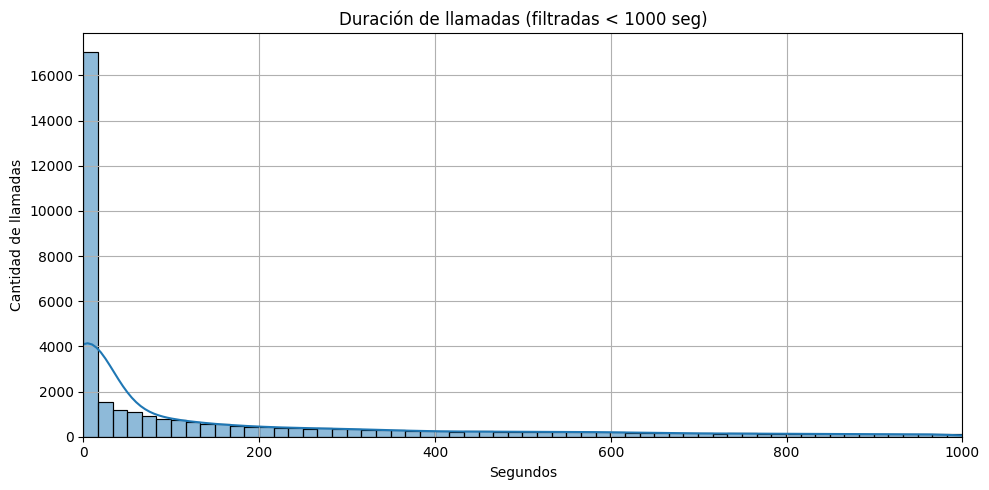

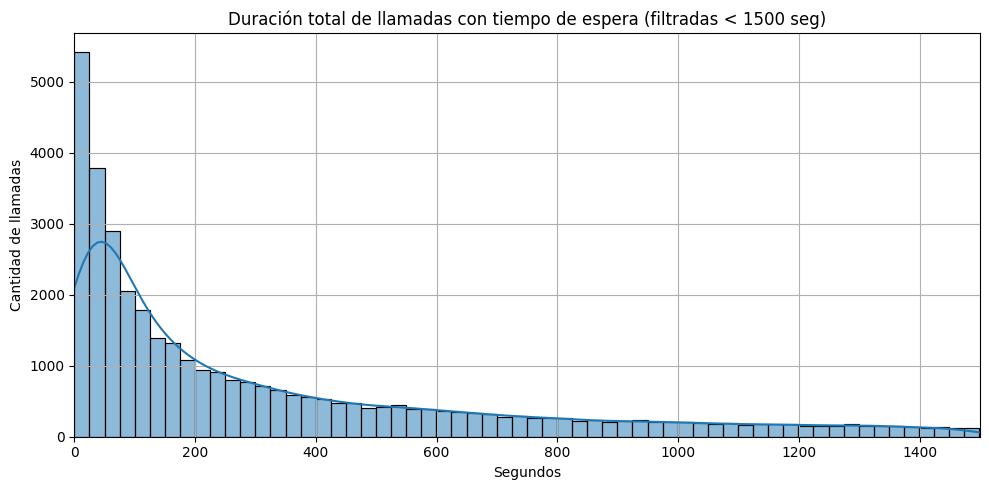

In [ ]:
#Histograma de duración de llamadas
plt.figure(figsize=(10, 5))
sns.histplot(df[df['call_duration'] < 1000]['call_duration'], bins=60, kde=True)
plt.title('Duración de llamadas (filtradas < 1000 seg)')
plt.xlabel('Segundos')
plt.ylabel('Cantidad de llamadas')
plt.xlim(0, 1000)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df[df['total_call_duration'] < 1500]['total_call_duration'], bins=60, kde=True)
plt.title('Duración total de llamadas con tiempo de espera (filtradas < 1500 seg)')
plt.xlabel('Segundos')
plt.ylabel('Cantidad de llamadas')
plt.xlim(0, 1500)
plt.grid(True)
plt.tight_layout()
plt.show()

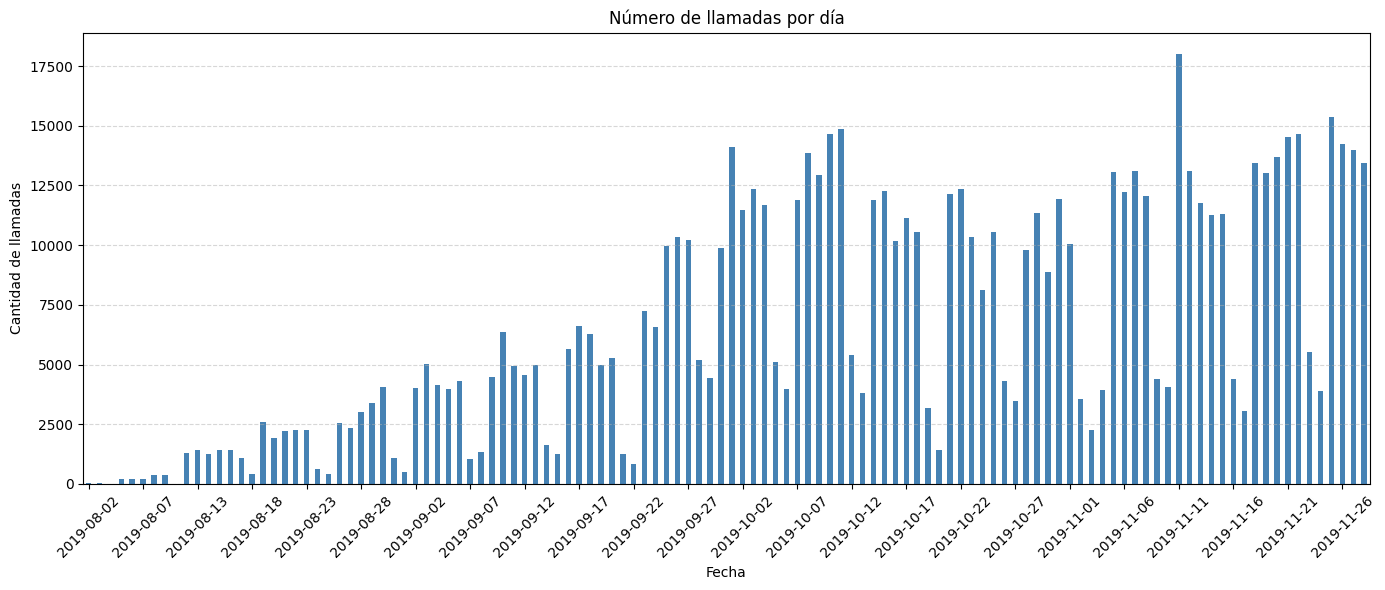

In [ ]:
#Histograma de llamadas por día
# Agrupar llamadas por día
calls_per_day = df.groupby('date')['calls_count'].sum()

# Crear gráfico
plt.figure(figsize=(14, 6))
ax = calls_per_day.plot(kind='bar', color='steelblue')

# Ajustar etiquetas del eje X: mostrar solo cada 5 fechas
xticks = ax.get_xticks()
ax.set_xticks(xticks[::5])  # Mostrar cada 5 etiquetas
ax.set_xticklabels(calls_per_day.index.strftime('%Y-%m-%d')[::5], rotation=45)

# Títulos y etiquetas
plt.title('Número de llamadas por día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de llamadas')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

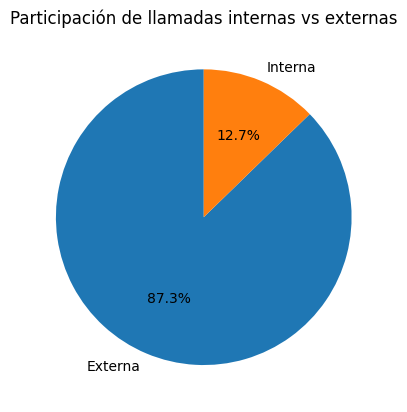

In [ ]:
# Gráfico circular con valores corregidos
df['internal'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Externa', 'Interna'], startangle=90)
plt.title('Participación de llamadas internas vs externas')
plt.ylabel('')
plt.show

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Excelente sección de análisis exploratorio. Has utilizado histogramas, gráficos de barras y gráficos circulares que permiten visualizar el comportamiento de las variables clave de manera clara y efectiva. El filtrado de outliers en la duración de llamadas también fue adecuado. Este tipo de EDA bien fundamentado permite tomar mejores decisiones en fases posteriores del proyecto. ¡Muy bien hecho!

</div>


## 🚨 3. Identificación de operadores ineficientes

In [ ]:
#Alta cifra de llamadas entrantes perdidas
in_calls = df[df['direction'] == 'in']
missed_by_operator = in_calls.groupby('operator_id').agg({
    'is_missed_call': 'sum',
    'calls_count': 'sum'
})
missed_by_operator['missed_rate'] = missed_by_operator['is_missed_call'] / missed_by_operator['calls_count']

In [ ]:
#Tiempos de espera largos
df['wait_time'] = df['total_call_duration'] - df['call_duration']
wait_by_operator = df.groupby('operator_id')['wait_time'].mean()

In [ ]:
#Bajo número de llamadas de salida
out_calls = df[df['direction'] == 'out']
out_by_operator = out_calls.groupby('operator_id')['calls_count'].sum()
low_out_threshold = out_by_operator.quantile(0.25)

In [ ]:
#Dividir por plan de tarifa
operator_tariff = df.groupby(['operator_id', 'tariff_plan']).size().reset_index(name='activity')
operator_tariff

,operator_id,tariff_plan,activity
0,879896.0,B,128
1,879898.0,B,251
2,880020.0,B,22
3,880022.0,B,76
4,880026.0,B,198
...,...,...,...
1087,972410.0,B,4
1088,972412.0,B,5
1089,972460.0,C,9
1090,973120.0,C,2


In [ ]:
#Destacar a operadores ineficientes
inefficient = pd.DataFrame({
    'missed_rate': missed_by_operator['missed_rate'],
    'avg_wait': wait_by_operator,
    'out_calls': out_by_operator
}).dropna()

inefficient['inefficient'] = (
    (inefficient['missed_rate'] > inefficient['missed_rate'].quantile(0.75)) &
    (inefficient['avg_wait'] > inefficient['avg_wait'].quantile(0.75)) &
    (inefficient['out_calls'] < low_out_threshold)
)

## 📐 4. Pruebas estadísticas

Al tratar de realizar una prueba T los datos nos dieron una "catastrophic cancellation".

* Esto ocurre cuando los valores en ambas muestras (ineff['avg_wait'] y eff['avg_wait']) son casi idénticos.

* El cálculo de la varianza se vuelve inestable, lo que hace que la precisón del resultado no sea buena.

Divide entre cero

* Puede suceder si una de las muestras tiene muy pocos elementos o todos los valores son iguales.

* Esto provoca que la desviación estándar sea cero, y al dividir por ella, se genera un error numérico.

✅ Solución: Usar una prueba no paramétrica más robusta
La prueba de Mann–Whitney U no requiere suposiciones sobre la distribución:

In [ ]:
#Comparación de duración promedio
eff = inefficient[inefficient['inefficient'] == False]

ineff = inefficient[inefficient['inefficient'] == True]

u_stat, p_u = mannwhitneyu(ineff['avg_wait'], eff['avg_wait'], alternative='two-sided')
print(f"Mann–Whitney U: U={u_stat:.2f}, p={p_u:.4f}")

Mann–Whitney U: U=495.00, p=0.1556


## 📌 Interpretación del resultado

* El valor p = 0.1556 es mayor que 0.05, lo que sugiere que no hay evidencia suficiente para afirmar que los tiempos de espera son diferentes entre operadores eficientes e ineficientes.

* Podemos interpretarlo: aunque los operadores ineficientes podrían parecer más lentos, estadísticamente no se puede confirmar esa diferencia con los datos actuales.

In [ ]:
#Prueba de proporciones
count = np.array([
    ineff['missed_rate'].mean() * ineff.shape[0],
    eff['missed_rate'].mean() * eff.shape[0]
])
nobs = np.array([ineff.shape[0], eff.shape[0]])
stat, p = proportions_ztest(count, nobs)
print(f"Prueba de proporciones: z={stat:.2f}, p={p:.4f}")

Prueba de proporciones: z=-0.04, p=0.9676


## 📌 Interpretación del resultado

z = -0.04: el estadístico z está muy cerca de cero, lo que indica que la diferencia entre las proporciones de llamadas perdidas en operadores eficientes e ineficientes es prácticamente nula.

p = 0.9676: este valor p es muchísimo más grande que el nivel de significancia (0.05), lo que significa que no hay evidencia estadística para afirmar que las tasas de llamadas perdidas son diferentes entre ambos grupos.

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Excelente criterio al identificar un problema de cancelación catastrófica con la prueba T y cambiar a una prueba no paramétrica más adecuada (Mann–Whitney U). Además, el uso de la prueba de proporciones Z para comparar tasas de llamadas perdidas entre grupos fue apropiado. Tus interpretaciones son correctas, prudentes y bien contextualizadas con relación al objetivo del proyecto. Este enfoque cuidadoso refleja pensamiento crítico estadístico. ¡Muy bien!

</div>


## 🔍 Conclusiones Generales

La proporción de llamadas perdidas entre operadores ineficientes y eficientes no es significativamente distinta.

Esto contradice la hipótesis de que los operadores ineficaces pierden más llamadas. Puede deberse a varias razones:

* El criterio de ineficiencia que estamos usando (combinación de espera, llamadas salientes, etc.) no está correlacionado con la tasa de abandono.

* La muestra de operadores ineficientes es muy pequeña, lo que no da un resultado contundente.

* El sistema distribuye las llamadas de forma que todos los operadores enfrentan tasas similares de abandono, independientemente de su desempeño.

## 🧠 ¿Qué hacer ahora?
* Replantear el criterio de ineficiencia: ¿quizás poner más el tiempo de espera o el volumen de llamadas?

* Analizar por segmentos: ¿hay diferencias por tipo de cliente (tariff_plan) o por día de la semana?

* Visualizar la distribución de missed_rate con boxplots para ver si hay outliers o patrones ocultos.

## 📚 Referencias
1. Virtanen, P., Gommers, R., Oliphant, T. E., Haberland, M., Reddy, T., Cournapeau, D., ... & van Mulbregt, P. (2020). SciPy 1.0: Fundamental algorithms for scientific computing in Python. Nature Methods, 17(3), 261–272. https://doi.org/10.1038/s41592-019-0686-2

2. Cohen, J. (1988). Statistical power analysis for the behavioral sciences (2nd ed.). Hillsdale, NJ: Lawrence Erlbaum Associates.

3. McKinney, W. (2010). Data structures for statistical computing in Python. In Proceedings of the 9th Python in Science Conference (pp. 51–56).

4. Waskom, M. L. (2021). seaborn: statistical data visualization. Journal of Open Source Software, 6(60), 3021. https://doi.org/10.21105/joss.03021

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Felicidades! Tu proyecto está <b>aprobado</b>. Has hecho un excelente trabajo en la identificación de operadores ineficaces, demostrando dominio en el tratamiento de datos reales, uso correcto de estadísticas no paramétricas, y una sólida interpretación de resultados.

#### Puntos Positivos:

- **Limpieza de datos bien argumentada:** Identificaste correctamente la naturaleza de los valores nulos y aplicaste un tratamiento justificado.
- **Visualización clara:** Gráficos bien elegidos que enriquecen el análisis.
- **Detección de ineficiencia:** Criterios lógicos para segmentar operadores y buen manejo de `groupby`, `agg` y filtros.
- **Uso apropiado de pruebas estadísticas:** Resolviste correctamente la cancelación catastrófica y aplicaste pruebas robustas como Mann–Whitney y proporciones Z.
- **Interpretación cuidadosa:** Buen análisis de los resultados y consideración de limitaciones de la muestra.

#### Áreas para Seguir Investigando:

- **Automatización y reutilización de código:** Podrías encapsular algunas lógicas de selección de ineficiencia en funciones reutilizables.
- **Análisis multivariado:** Considerar modelos de regresión logística para identificar predictores más robustos de ineficiencia.
- **Visualización final:** Incluir un resumen visual de operadores destacados (ineficientes vs eficientes) ayudaría a comunicar los hallazgos más claramente.

¡Excelente enfoque analítico y técnica! Continúa por este camino y no dejes de explorar nuevas formas de visualizar y modelar tus hipótesis. 💡📈🔍

</div>
